# Project: Investigate a Dataset - [Soccer Database]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The dataset analysed here is the soccer database which contains information on soccer matches, soccer players, and teams from several European countries from the year 2008 to 2016. 

The soccer database contains six(6) tables named Player_Attributes, Player, Match, League, Country, Team, and Team_Attributes. 

The Player_Attributes contains the rating of individual player's abilities over the seasons which is linked with the Player table, by the attribute player_api_id and player_fifa_api_id, which contains basic information of a player. 

The Match table contains the statistics of games playes from the 2007/2008 season to the 2015/2016 season of selected European leagues. The Match table is linked to the Player_Attributes, Player, League, Country, Team, and Team_Attributes. 

The League table contains the name of the top flight leagues in select countries in Europe. 

The Country table contains the name of countries of the leagues.

The Team table contains the name of the teams in the selected leagues.

The Team_Attributes contains the abilities of the individual teams in different seasons.

Due to the large number of columns, the columns found in the different tables would be seen in the next session.


The data source used in this study is an sqlite file, which is an sql database. Therefore, sql queries would be ran tooperate on the tables in the database.

The major aim of this study is to find out what team and league has the most goals scored. To achieve this, the Match table will joined with the team and league tables to get the goals scored by a team or league. Then, the result will be communicated using a bar plot.



### Question(s) for Analysis

During the course of analyzing the soccer database, the following questions will be addresseed.

1. Does the height of a goal keeper affect the overall rating of the keeper?

2. Do tall players have high heading accuracy

3. Does the weight of a player affect the player's speed?

4. What team in each league has the most goals in the 2015/2016 season?

5. What league has the highest scored goals?


In [2]:
# Needed packages were imported
%matplotlib inline 
import sqlite3 # used to load and work with databases
import pandas as pd # used to manage data in dataframes
import matplotlib.pyplot as plt # used to plot or visualize data
import seaborn as sns  # used to plot or visualize data


<a id='wrangling'></a>
## Data Wrangling


In [3]:
# A function to load the database

def connect(x):
    
    '''
    This function connects to a database, creating a session.

            Parameters:
                    x (string): The name of the database

            Returns:
                    session (obj): The connection
    '''
    
    session = sqlite3.connect(f'{x}')
    
    return session

In [4]:
# A function to write queries to the database 
# and return a result in a dataframe format

query = lambda x , y = None: pd.read_sql_query(x, conn, index_col = y)

In [5]:
# A function to inspect a table in the database

def intel(x, y = None):
    
    '''
    This function Returns the information of a table in a database.

            Parameters:
                    x (string): Name of the table in database
                    y (string): Index column

            Returns:
                    df (dataframe): A dataframe containing the information of a table in a database.
    '''
    
    df = query(f'''PRAGMA table_info('{x}');''', y)
    
    return df

In [6]:
# A function to give a summary of the tables in the database

def summ(x):
    
    '''
    Returns the .info(), .describe(), and .head(3) of a table in a database

            Parameters:
                    x (string): Sql query to select the table

            Returns:
                    displays the .info(), .describe(), and .head(3) of a table in a database
                    queried by the statement x

    '''
    
    head = query(f'{x}').head(3)
    
    info = query(f'{x}').info()
    
    desc = query(f'{x}').describe()
    
    return display(desc, head)

In [7]:
# A function to plot/visualize data

def draw(kind,x_axis,palette,title,y_axis = None, x_label = None,y_label = None):
    
    '''
    Returns a plot.

            Parameters:
                    kind (string): The type of plot e.g 'barplot'
                    x_axis (dataframe): What you want  to plot eg 'df['customer']'
                    y_axis (dataframe): What you want  to plot against x_axis eg 'df['age']'   (OPTIONAL)
                    x_label (string): Label for the x_axis                                     (OPTIONAL)
                    y_label (string): Label for the y_axis                                     (OPTIONAL)
                    palette (string): Palette for plotting the chart e.g 'Blues_d'
                    title (string): The title of the plotted chart

            Returns:
                    Displays the plot 
    '''
    
    plt.figure(figsize=(15,8))
    
    if kind == 'barplot':
        
        sns.barplot(x = x_axis, y = y_axis, palette = palette)
    
    elif kind == 'boxplot':
        
        sns.boxplot(x = x_axis, y = y_axis, palette = palette)
    
    elif kind == 'histplot':
        
        sns.histplot(x = x_axis, palette = palette)
    
    else:
        
        plt.plot( x_axis, y_axis)
    
    plt.xticks(rotation='vertical')
    
    plt.title(title)
    
    plt.xlabel(x_label)
    
    plt.ylabel(y_label)
    
    return plt.show();

In [8]:
conn = connect('soccer_database.sqlite')

In [9]:
# To see the tables in the database

query("SELECT * FROM sqlite_master WHERE type= 'table';")['tbl_name'][1:]

1    Player_Attributes
2               Player
3                Match
4               League
5              Country
6                 Team
7      Team_Attributes
Name: tbl_name, dtype: object

In [10]:
# To show the columns in the Team_Attributes table and its data type

intel('Team_Attributes')[['name', 'type']].head(4)

,name,type
0,id,INTEGER
1,team_fifa_api_id,INTEGER
2,team_api_id,INTEGER
3,date,TEXT


1. id => This the a unique identifier of this table (primary key).
2. team_fifa_api_id => This is the unique identifier of the team on fifa.
3. team_api_id => This is a unique unique identifier of the team.
4. date => That dat the rating was done.

The rest of the columns are the attributes that describes the gameplay of the team.

This table is linked to all other tables in the database using team_fifa_api_id, and team_api_id except for the Country and League tables.

In [11]:
# To show the columns in the Team table and its data type

intel('Team')[['name', 'type']]

,name,type
0,id,INTEGER
1,team_api_id,INTEGER
2,team_fifa_api_id,INTEGER
3,team_long_name,TEXT
4,team_short_name,TEXT


1. id => This the a unique identifier of this table (primary key).
2. team_api_id => This is a unique identifier of the team.
3. team_fifa_api_id => This is the unique identifier of the team on fifa.
4. team_long_name => This is the full name of the team.
5. team_short_name => This is the abbreviation of the team's name.

This table is linked to all other tables in the database using team_fifa_api_id, and team_api_id except for the Country and League tables.

In [12]:
# To show the columns in the Country table and its data type

intel('Country')[['name', 'type']]

,name,type
0,id,INTEGER
1,name,TEXT


1. id => This the a unique identifier of this table (primary key).
2. name => This is the name of the country

This table is linked to the Match and League tables using the id.

In [13]:
# To show the columns in the League table and its data type

intel('League')[['name', 'type']]

,name,type
0,id,INTEGER
1,country_id,INTEGER
2,name,TEXT


1. id => This the a unique identifier of this table (primary key).
2. country_id => This is the identifier for the country of the league.
3. name => The name of the league

This table is linked to the Match and Country tables using either the id or the country_id.

In [14]:
# To show the columns in the Player table and its data type

intel('Player')[['name', 'type']]

,name,type
0,id,INTEGER
1,player_api_id,INTEGER
2,player_name,TEXT
3,player_fifa_api_id,INTEGER
4,birthday,TEXT
5,height,INTEGER
6,weight,INTEGER


1. id => This the a unique identifier of this table (primary key).
2. player_api_id => This a unique identifier of a player.
3. Player_name => This is the name of the player.
4. player_fifa_api_id => This is the unique identifier of a player on fifa.
5. birthday => This is the date of birth of a player.
6. Height => This is the height of a players.
7. Weight => This the weight of a player.

This table is linked to all tables within the database using the player_api_id and player_fifa_api_id, except for the Country and League table.

In [15]:
# To show the columns in the Player_Attributes table and its data type

intel('Player_Attributes')[['name', 'type']].head(7)

,name,type
0,id,INTEGER
1,player_fifa_api_id,INTEGER
2,player_api_id,INTEGER
3,date,TEXT
4,overall_rating,INTEGER
5,potential,INTEGER
6,preferred_foot,TEXT


1. id => This the a unique identifier of this table (primary key).
2. player_fifa_api_id => This is the unique identifier of a player on fifa.
3. player_api_id => This a unique identifier of a player.
4. data => The date of which the attribute was documneted.
5. Overall_rating => This is the total rating of  player.
6. Potential => This the highest mark the player is expected to get to in ratings.
7. Preferred_foot => The stong foot of the player (right or left).

The rest of the columns are intuitive, they further describe the abilities of a player.

This table is linked to all tables within the database using the player_api_id and player_fifa_api_id, except for the Country and League table.

In [16]:
# To show the columns in the Match table and its data type
# The table has a lot of rows, hence, the use of display.max_rows

intel('Match')[['name', 'type']].head(10)

,name,type
0,id,INTEGER
1,country_id,INTEGER
2,league_id,INTEGER
3,season,TEXT
4,stage,INTEGER
5,date,TEXT
6,match_api_id,INTEGER
7,home_team_api_id,INTEGER
8,away_team_api_id,INTEGER
9,home_team_goal,INTEGER


1. id => This the a unique identifier of this table (primary key).
2. country_id => This is the identifier for the country of the league.
3. league_id =>  This is the identifier for the league.
4. Season => This is the season the match was played.
5. Stage => This is the stage of the league.
6. date => The date the match was played.
7. match_api_id => The unique identifier for the matches.
8. home_team_api_id => The team unique identifier of the home team.
9. away_team_api_id => The team unique identifier of the away team.
10. home_team_goal => The of goals scored by the home team in that match.
11. away_team_goal => The of goals scored by the away team in that match.
12. home_player_X1 => The rtung of the first player in the home team for that match
13. home_player_1 => This is the unique identifier for a specific player in the home team.

Based on the explained columns the rest of the comlumns are self_explanatory. However, from the print above, the index 85 to 114 gives the odds for home to win, draw, and away to win, given by different bookmakers.

This table is linked to all tables within the database.

The following prints some lines of each of the tables in dataframes and also gives a summary of the tables using a user defined fuction, summ()

In [17]:
summ("SELECT * FROM Team_Attributes")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
id                                1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossingClass       1458 non-null object
chanceCreationShooting            1458 non-null int64
chanceCreationShootin

,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,1458.000000,1458.000000,1458.000000,1458.000000,489.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.500000,17706.982167,9995.727023,52.462277,48.607362,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871
std,421.032659,39179.857739,13264.869900,11.545869,9.678290,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712
min,1.000000,1.000000,1601.000000,20.000000,24.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000
25%,365.250000,110.000000,8457.750000,45.000000,42.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000
50%,729.500000,485.000000,8674.000000,52.000000,49.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000
75%,1093.750000,1900.000000,9904.000000,62.000000,55.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000
max,1458.000000,112513.000000,274581.000000,80.000000,77.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000


,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover





The table, Team_Attributes, has 1,458 rows and 25 columns.

The column, buildUpPlayDribbling, is missing a lot of values.




In [18]:
summ("SELECT * FROM Team")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
id                  299 non-null int64
team_api_id         299 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      299 non-null object
team_short_name     299 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


,id,team_api_id,team_fifa_api_id
count,299.000000,299.000000,288.000000
mean,23735.301003,12340.521739,21534.305556
std,15167.914719,25940.411135,42456.439408
min,1.000000,1601.000000,1.000000
25%,9552.500000,8349.000000,178.750000
50%,22805.000000,8655.000000,673.500000
75%,36250.500000,9886.500000,1910.750000
max,51606.000000,274581.000000,112513.000000


,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL





The table, Team, has 299 rows and 5 columns.

There are 299 teams recorded in this dataset

The column, team_fifa_api_id, is missing some values.




In [19]:
summ("SELECT * FROM Country")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
id      11 non-null int64
name    11 non-null object
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


,id
count,11.000000
mean,12452.090909
std,8215.308472
min,1.000000
25%,6289.000000
50%,13274.000000
75%,18668.000000
max,24558.000000


,id,name
0,1,Belgium
1,1729,England
2,4769,France





The Country, Team, has 11 rows and 2 columns.

There are 11 countries selected in this dataset.

No missing value.



In [20]:
summ("SELECT * FROM Player")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 604.9+ KB


,id,player_api_id,player_fifa_api_id,height,weight
count,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000
mean,5537.511392,156582.427215,165664.910488,181.867445,168.380289
std,3197.692647,160713.700624,58649.928360,6.369201,14.990217
min,1.000000,2625.000000,2.000000,157.480000,117.000000
25%,2767.750000,35555.500000,151889.500000,177.800000,159.000000
50%,5536.500000,96619.500000,184671.000000,182.880000,168.000000
75%,8306.250000,212470.500000,203883.250000,185.420000,179.000000
max,11075.000000,750584.000000,234141.000000,208.280000,243.000000


,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163





The table, Player, has 11,060 rows and 7 columns.

There are 1,1060 players recorded in this dataset.

No missing value.




In [21]:
summ("SELECT * FROM Player_Attributes")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0





The table, Player_Attributes, has 183,978 rows and 42 columns.

The table is plagued with missing values, having only the id, player_fifa_api_id, player_api_id, date, and 
attacking_work_rate columns without missing values.



In [22]:
summ("SELECT * FROM Match")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
count,25979.000000,25979.000000,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000,25979.000000,24158.000000,...,17097.000000,22568.000000,22568.000000,22568.000000,14162.000000,14162.000000,14162.000000,14161.000000,14161.000000,14161.000000
mean,12990.000000,11738.630317,11738.630317,18.242773,1.195429e+06,9984.371993,9984.475115,1.544594,1.160938,0.999586,...,4.622343,2.668107,3.899048,4.840281,2.498764,3.648189,4.353097,2.497894,3.660742,4.405663
std,7499.635658,7553.936759,7553.936759,10.407354,4.946279e+05,14087.453758,14087.445135,1.297158,1.142110,0.022284,...,3.632164,1.928753,1.248221,4.318338,1.489299,0.867440,3.010189,1.507793,0.868272,3.189814
min,1.000000,1.000000,1.000000,1.000000,4.831290e+05,1601.000000,1601.000000,0.000000,0.000000,0.000000,...,1.100000,1.030000,1.620000,1.080000,1.050000,1.450000,1.120000,1.040000,1.330000,1.120000
25%,6495.500000,4769.000000,4769.000000,9.000000,7.684365e+05,8475.000000,8475.000000,1.000000,0.000000,1.000000,...,2.500000,1.700000,3.300000,2.550000,1.670000,3.200000,2.500000,1.670000,3.250000,2.500000
50%,12990.000000,10257.000000,10257.000000,18.000000,1.147511e+06,8697.000000,8697.000000,1.000000,1.000000,1.000000,...,3.500000,2.150000,3.500000,3.500000,2.100000,3.300000,3.400000,2.100000,3.400000,3.400000
75%,19484.500000,17642.000000,17642.000000,27.000000,1.709852e+06,9925.000000,9925.000000,2.000000,2.000000,1.000000,...,5.250000,2.800000,4.000000,5.400000,2.650000,3.750000,5.000000,2.620000,3.750000,5.000000
max,25979.000000,24558.000000,24558.000000,38.000000,2.216672e+06,274581.000000,274581.000000,10.000000,9.000000,2.000000,...,41.000000,36.000000,26.000000,67.000000,21.000000,11.000000,34.000000,17.000000,13.000000,34.000000


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.0,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.8,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.5,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75


In [23]:
with pd.option_context('display.max_rows', None,):
    
    print(query("SELECT * FROM Match").isna().sum())

id                      0
country_id              0
league_id               0
season                  0
stage                   0
date                    0
match_api_id            0
home_team_api_id        0
away_team_api_id        0
home_team_goal          0
away_team_goal          0
home_player_X1       1821
home_player_X2       1821
home_player_X3       1832
home_player_X4       1832
home_player_X5       1832
home_player_X6       1832
home_player_X7       1832
home_player_X8       1832
home_player_X9       1832
home_player_X10      1832
home_player_X11      1832
away_player_X1       1832
away_player_X2       1832
away_player_X3       1832
away_player_X4       1832
away_player_X5       1832
away_player_X6       1832
away_player_X7       1832
away_player_X8       1832
away_player_X9       1833
away_player_X10      1833
away_player_X11      1839
home_player_Y1       1821
home_player_Y2       1821
home_player_Y3       1832
home_player_Y4       1832
home_player_Y5       1832
home_player_




The table, Match, has 25,979 rows and 115 columns.

There are 25,979 matches recorded in this dataset.

The table is plagued with missing values, having only the id, country_id, league_id, season, stage, date, match_api_id,
home_team_api_id, away_team_api_id, home_team_goal, and away_team_goal columns without missing values.





### Data Cleaning

 

Based on the nature of the dataset, data cleaning would be carried out as per needed.

The sql database is queried to retrieve the needed columns to carry out the analysis.

Although some of the information in the database tables are missing, the data realized after linking the necessary table within the database was checked for irregularities and none was found. The unecessary columns, which were mostly the columns with issues, were therefore dropped as they were not needed for this analysis.

<a id='eda'></a>
## Exploratory Data Analysis

<ul>
<li><a href="#r1">Research Question 1 (Does the height of a goal keeper affect the overall rating of the keeper?)</a></li>
<li><a href="#r2">Research Question 2  (Do tall players have a high heading accuracy?</a></li>
<li><a href="#r3">Research Question 3  (Does the weight of a player affect the speed of the player ?)</a></li>
<li><a href="#r4">Research Question 4  (What team has the most goals the 2015/2016 season in each league?)</a></li>
<li><a href="#r5">Research Question 5  (What league has the average highest scored goals  ?)</a></li>
</ul>


<a id='r1'></a>
### Research Question 1 (Does the height of a goal keeper affect the overall rating of the keeper?)

In [24]:
# Performing an inner join between the Player and Player_Attributes Table
# Since there isn't any column giving the possition played by the player, all players with a goal keeper diving ability 
# of 50 and more will be selected.
# And returning it as a pandas dataframe

keeper_rating_df = query("SELECT Player.height, Player.player_api_id, Player_Attributes.overall_rating, Player_Attributes.date" 
                         " FROM Player INNER JOIN Player_Attributes ON" 
                         " Player_Attributes.player_api_id = Player.player_api_id WHERE gk_diving >= 50")

In [25]:
# To convert the date column to a date datatype

keeper_rating_df['date'] = pd.to_datetime(keeper_rating_df['date'])

In [26]:
# To group the data by the goal keepers and select the most recent rating of the keeper

keeper_rating_df = keeper_rating_df.groupby('player_api_id').max()

In [27]:
keeper_rating_df.drop('date', axis = 1, inplace = True)

In [28]:
# To get a summary of the above created dataframe

keeper_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 961 entries, 2796 to 698273
Data columns (total 2 columns):
height            961 non-null float64
overall_rating    961 non-null int64
dtypes: float64(1), int64(1)
memory usage: 22.5 KB


The dataframe consists of 961 rows, and height and overall_rating as the two columns.

There are 961 goal keepers in the dataset.

There is no missing value present.

In [29]:
# To describe the keeper rating dataframe

keeper_rating_df.describe()

,height,overall_rating
count,961.000000,961.000000
mean,188.694776,70.550468
std,4.727503,7.464206
min,172.720000,48.000000
25%,185.420000,66.000000
50%,187.960000,71.000000
75%,193.040000,76.000000
max,208.280000,93.000000


The tallest goal keeper within the dataset has a height of 208.28cm and the shortest has a height of 172.72cm. However, on an average, the height of a goal keeper is 188.69cm.

Moreover, the average overall_rating of goal keepers is 70.55, with the maximum at 93 and minimum at 48


,overall_rating
count,961.000000
mean,70.550468
std,7.464206
min,48.000000
25%,66.000000
50%,71.000000
75%,76.000000
max,93.000000


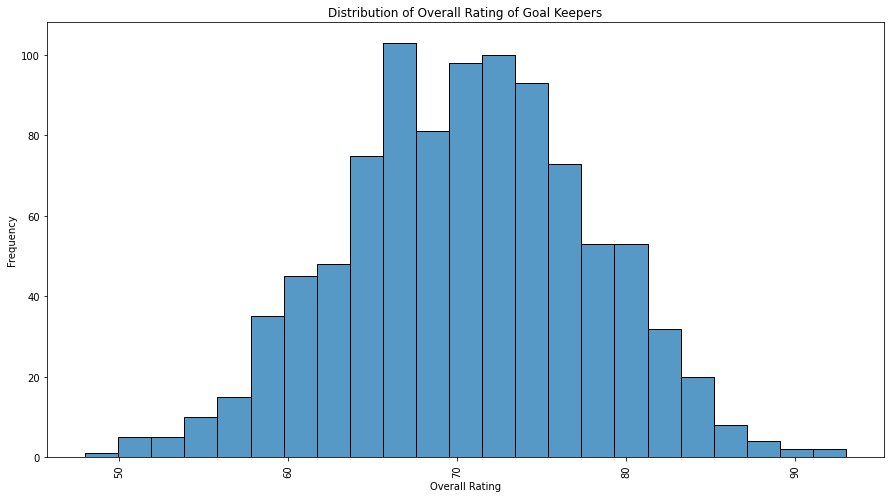

In [30]:
# To plot the distribution of the overall rating of goal keepers

display(pd.DataFrame(keeper_rating_df['overall_rating'].describe()))

draw(kind = 'histplot', x_axis = keeper_rating_df['overall_rating'], palette = 'blue_d', 
     title = 'Distribution of Overall Rating of Goal Keepers',  x_label = 'Overall Rating', y_label = 'Frequency' )

Based on the plot there seem to be, roughly, a normal distribution, however, it seems to be extremely slightly skewed to the left.
Meaning we have more goal keepers with an overall rating on the lower side of the spectrum.

,height
count,961.000000
mean,188.694776
std,4.727503
min,172.720000
25%,185.420000
50%,187.960000
75%,193.040000
max,208.280000


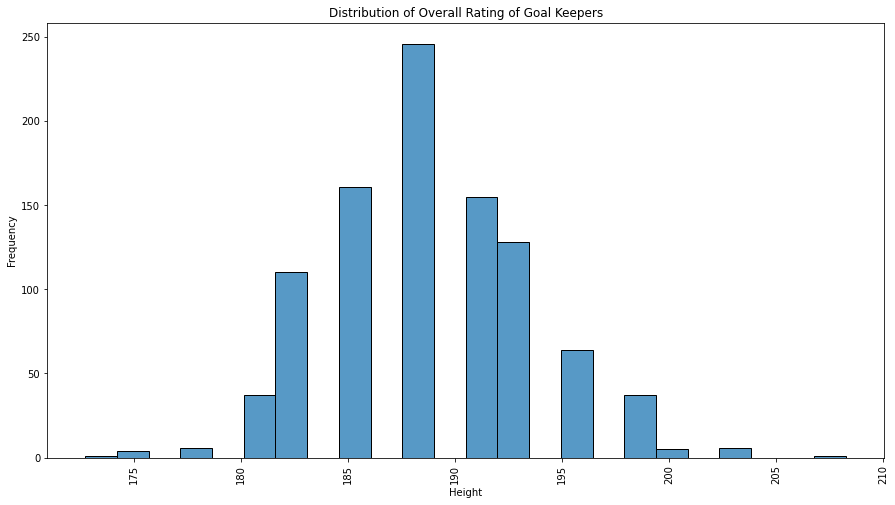

In [31]:
# To plot the distribution of the height of goal keepers

display(pd.DataFrame(keeper_rating_df['height'].describe()))

draw(kind = 'histplot', x_axis = keeper_rating_df['height'], palette = 'blue_d', 
     title = 'Distribution of Overall Rating of Goal Keepers',  x_label = 'Height', y_label = 'Frequency' )

Based on the plot there seem to be, roughly, a normal distribution, however, it seems to be extremely slightly skewed to the right.
Meaning we have more goal keepers with a height on the higher side of the spectrum.

,height,overall_rating
count,961.000000,961.000000
mean,188.694776,70.550468
std,4.727503,7.464206
min,172.720000,48.000000
25%,185.420000,66.000000
50%,187.960000,71.000000
75%,193.040000,76.000000
max,208.280000,93.000000


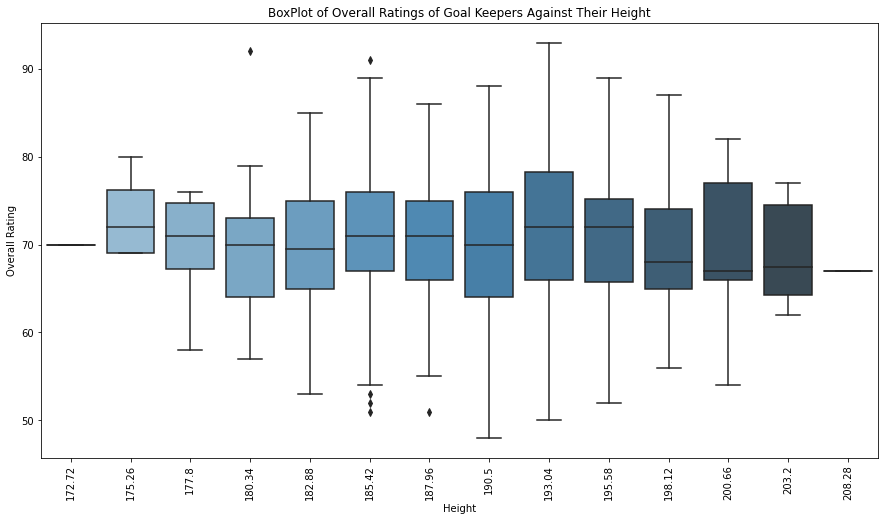

In [32]:
# To plot the relationship between height and overall_ratting using a scatter plot

display(pd.DataFrame(keeper_rating_df.describe()))

draw(kind = 'boxplot', x_axis = keeper_rating_df['height'], y_axis = keeper_rating_df['overall_rating'], 
     title = 'BoxPlot of Overall Ratings of Goal Keepers Against Their Height', palette = 'Blues_d',  x_label = 'Height', y_label = 'Overall Rating')

### Does the height of a goal keeper affects the overall rating of the keeper?

There seems to be no relationship between the overall rating of goal keepers and their height.

However, based on the chart above, it is seen that having a height on the extreme ends of the distribution spells a relatively poor to average overall rating.

Therefore, there is a right level of height to have to possibly be a top rated goal keeper.
Approximately, the heights between 185cm and 195cm seems to be just about the right height.



<a id='r2'></a>
### Research Question 2  (Do tall players have a high heading accuracy?)

In [33]:
# Performing an inner join between the Player and Player_Attributes Table
# And returning it as a pandas dataframe

heading_accuracy_df = query("SELECT Player.height, Player.player_api_id, Player_Attributes.heading_accuracy," 
                            " Player_Attributes.date FROM Player INNER JOIN Player_Attributes ON" 
                            " Player_Attributes.player_api_id = Player.player_api_id ")


In [34]:
# To convert the date column to a date datatype

heading_accuracy_df['date'] = pd.to_datetime(heading_accuracy_df['date'])

In [35]:
# To group the data by the goal keepers and select the most recent rating of the keeper

heading_accuracy_df = heading_accuracy_df.groupby('player_api_id').max()

In [36]:
# To drop the date column

heading_accuracy_df.drop('date', axis = 1, inplace = True)

In [37]:
# To drop the ratings of goal keepers

heading_accuracy_df.drop(keeper_rating_df.index, inplace = True)

In [38]:
# To give the summary of the player header rating dataframe

heading_accuracy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10099 entries, 2625 to 750584
Data columns (total 2 columns):
height              10099 non-null float64
heading_accuracy    10099 non-null float64
dtypes: float64(2)
memory usage: 236.7 KB


The dataframe consistes of 10099 rows which is the total number of players in the dataset aspart from the goal keepers, while height and heading_accuracy are the two columns.

There is no missing value.

In [39]:
# To describe the Player header rating dataframe

heading_accuracy_df.describe()

,height,heading_accuracy
count,10099.000000,10099.000000
mean,181.217770,63.831865
std,6.119194,12.192157
min,157.480000,19.000000
25%,177.800000,56.000000
50%,180.340000,65.000000
75%,185.420000,72.000000
max,203.200000,98.000000


The tallest player within the dataset has a height of 203.2cm and the shortest has a height of 157.48cm. However, on an average, the height of a player is 181.21cm.

Moreover, the average heading accuracy of players is 63.83, with the maximum at 98 and minimum at 19


,heading_accuracy
count,10099.000000
mean,63.831865
std,12.192157
min,19.000000
25%,56.000000
50%,65.000000
75%,72.000000
max,98.000000


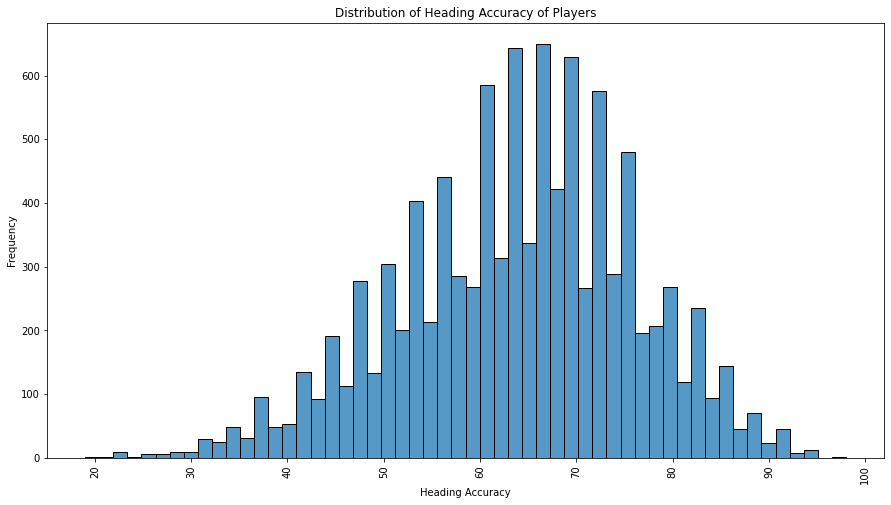

In [40]:
# To plot the distribution of the heading accuracy of players

display(pd.DataFrame(heading_accuracy_df['heading_accuracy'].describe()))

draw(kind = 'histplot', x_axis = heading_accuracy_df['heading_accuracy'], palette = 'blue_d', 
     title = 'Distribution of Heading Accuracy of Players' , x_label = 'Heading Accuracy', y_label = 'Frequency' )

Based on the plot the distribution seems to be skewed to the left.
Meaning we have more players with a heading accuracy on the higher side of the distribution.

,height
count,10099.000000
mean,181.217770
std,6.119194
min,157.480000
25%,177.800000
50%,180.340000
75%,185.420000
max,203.200000


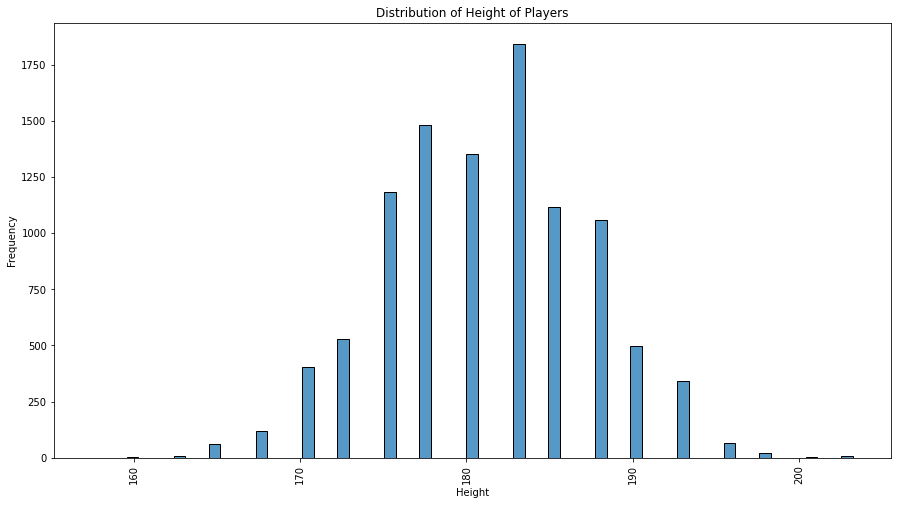

In [41]:
# To plot the distribution of the height of players

display(pd.DataFrame(heading_accuracy_df['height'].describe()))

draw(kind = 'histplot', x_axis = heading_accuracy_df['height'], palette = 'blue_d', 
     title = 'Distribution of Height of Players', x_label = 'Height', y_label = 'Frequency' )

Based on the plot, the distribution seems to be slightly skewed to the right.
Meaning we have more players with a height on the higher side of the distribution.

,height,heading_accuracy
count,10099.000000,10099.000000
mean,181.217770,63.831865
std,6.119194,12.192157
min,157.480000,19.000000
25%,177.800000,56.000000
50%,180.340000,65.000000
75%,185.420000,72.000000
max,203.200000,98.000000


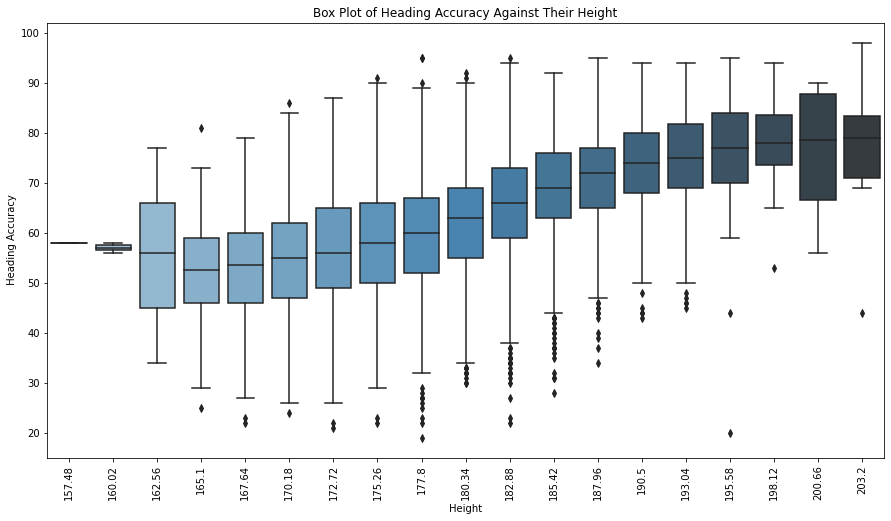

In [42]:
# To plot the relationship between height and heading accuracy using a scatter plot

display(pd.DataFrame(heading_accuracy_df.describe()))

draw(kind = 'boxplot', x_axis = heading_accuracy_df['height'], y_axis = heading_accuracy_df['heading_accuracy'], 
     title = 'Box Plot of Heading Accuracy Against Their Height', palette = 'Blues_d', 
     x_label = 'Height', y_label = ' Heading Accuracy')

#### Do tall players have a high heading accuracy?

There seems to be a weak positive relationship between the heading accuracy of players and their height.

Meaning that the taller the player the more likeliness for the player to have a high heading accuracy.

<a id='r3'></a>
### Research Question 3  (Does the weight of a player affect the speed of the player ?)

In [43]:
# Performing an inner join between the Player and Player_Attributes Table
# And returning it as a pandas dataframe

player_speed_df = query("SELECT Player.weight, Player.player_api_id, Player_Attributes.sprint_speed," 
                            " Player_Attributes.date FROM Player INNER JOIN Player_Attributes ON" 
                            " Player_Attributes.player_api_id = Player.player_api_id ")


In [44]:
# To convert the date column to a date datatype

player_speed_df['date'] = pd.to_datetime(player_speed_df['date'])

In [45]:
# To group the data by the players and select the most recent rating of the Player

player_speed_df = player_speed_df.groupby('player_api_id').max()

In [46]:
# To drop the date column

player_speed_df.drop('date', axis = 1, inplace = True)

In [47]:
# To drop the ratings of goal keepers

player_speed_df.drop(keeper_rating_df.index, inplace = True)

In [48]:
# To give the summary of the player speed rating dataframe

player_speed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10099 entries, 2625 to 750584
Data columns (total 2 columns):
weight          10099 non-null int64
sprint_speed    10099 non-null float64
dtypes: float64(1), int64(1)
memory usage: 236.7 KB


The dataframe consistes of 10099 rows which is the total number of players in the dataset apart from the goal keepers, while weight and sprint_speed are the two columns.

There is no missing value.

In [49]:
# To describe the Player Speed rating dataframe

player_speed_df.describe()

,weight,sprint_speed
count,10099.000000,10099.000000
mean,166.857313,74.240519
std,14.276801,8.920551
min,117.000000,31.000000
25%,157.000000,68.000000
50%,165.000000,74.000000
75%,176.000000,80.000000
max,225.000000,97.000000


The weightiest players within the dataset has a weight of 225 lbs and the lightest has a weight of 117 lbs. However, on an average, the weight of a player is 166.86 lbs.

Moreover, the average sprint speed of players is 74.24, with the maximum at 97 and minimum at 31


,sprint_speed
count,10099.000000
mean,74.240519
std,8.920551
min,31.000000
25%,68.000000
50%,74.000000
75%,80.000000
max,97.000000


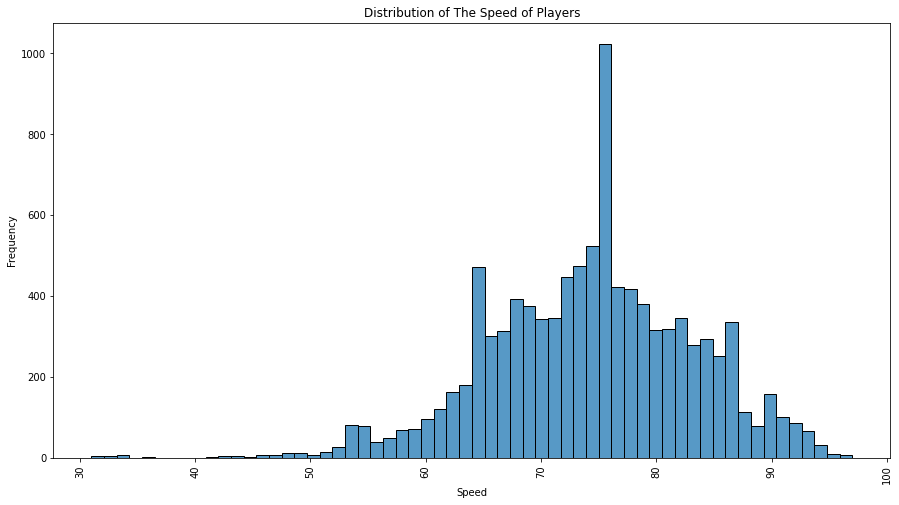

In [50]:
# To plot the distribution of the speed of players

display(pd.DataFrame(player_speed_df['sprint_speed'].describe()))

draw(kind = 'histplot', x_axis = player_speed_df['sprint_speed'], palette = 'Blues_d', 
     title = 'Distribution of The Speed of Players',  x_label = 'Speed', y_label = 'Frequency' )

Based on the plot the distribution seems to be skewed to the left.
Meaning we have more players with a sprint speed on the higher side of the distribution.

,weight
count,10099.000000
mean,166.857313
std,14.276801
min,117.000000
25%,157.000000
50%,165.000000
75%,176.000000
max,225.000000


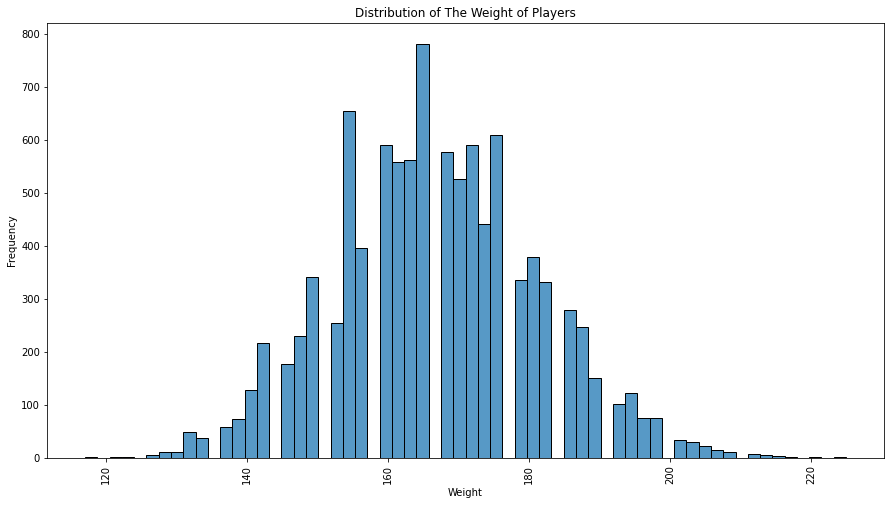

In [51]:
# To plot the distribution of the weight of players

display(pd.DataFrame(player_speed_df['weight'].describe()))

draw(kind = 'histplot', x_axis = player_speed_df['weight'], palette = 'Blues_d', 
     title = 'Distribution of The Weight of Players' ,  x_label = 'Weight', y_label = 'Frequency')

Based on the plot, the distribution seems to be slightly skewed to the right.
Meaning we have more players with a weight on the lower side of the distribution.

,weight,sprint_speed
count,10099.000000,10099.000000
mean,166.857313,74.240519
std,14.276801,8.920551
min,117.000000,31.000000
25%,157.000000,68.000000
50%,165.000000,74.000000
75%,176.000000,80.000000
max,225.000000,97.000000


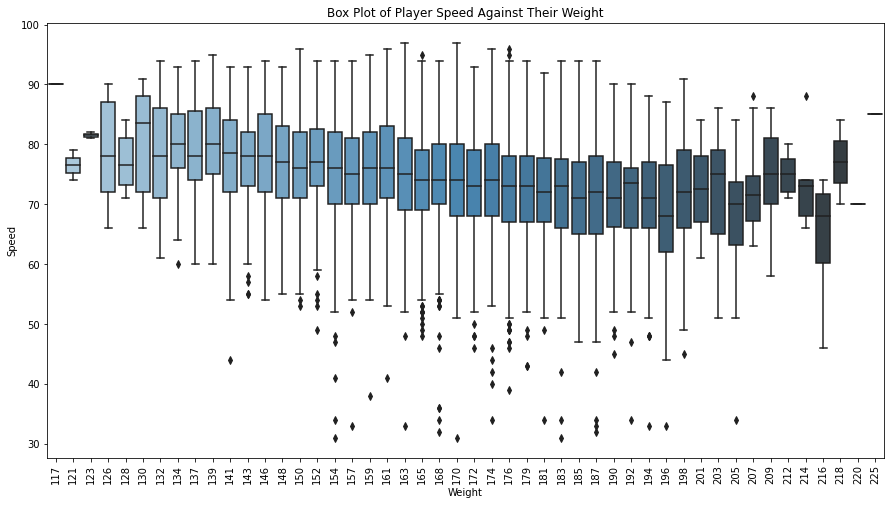

In [52]:
# To plot the relationship between weight and sprint speed of players using a scatter plot

display(pd.DataFrame(player_speed_df.describe()))

draw(kind = 'boxplot', x_axis = player_speed_df['weight'], y_axis = player_speed_df['sprint_speed'], 
     title = 'Box Plot of Player Speed Against Their Weight', 
     palette = 'Blues_d', x_label = 'Weight', y_label = 'Speed')

#### Does the weight of a player affect the speed of the player ?

There seems to be a neutral correlation between weight and sprint speed of players in the dataset.

Meaning that the weight of a player does not tell the speed of the player.

However, based on the plot above, it can be seen that although there isn't a correlation, lighter players are most likely fast players.

<a id='r4'></a>
### Research Question 4  (What team has the most goals the 2015/2016 season in each league?)

In [53]:
# Performing an inner join between the Match and League Table
# And returning it as a pandas dataframe

team_goal_df = query(" SELECT home_team_api_id as team_id, goal, league, Team.team_long_name"
                      " FROM (SELECT Match.home_team_api_id, SUM(Match.home_team_goal) as goal,"
                      " Match.season, League.name as league FROM Match INNER JOIN League ON" 
                      " Match.league_id = League.id WHERE season = '2015/2016' GROUP BY home_team_api_id)"
                      " INNER JOIN Team ON Team.team_api_id = home_team_api_id "
                     )

In [54]:
# Getting the index of the teams with the highest scored goals for each league

team_goal_index = team_goal_df.groupby('league')['goal'].idxmax()

In [55]:
# Sorting the table by the number of goals scored
# Ascending order

team_goal_df = team_goal_df.iloc[team_goal_index].sort_values('goal')

In [56]:
# Dropping the team Id as it is not necessary

team_goal_df.drop('team_id', axis = 1, inplace = True)

In [57]:
# Summary of the Team_goals table

team_goal_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 4 to 79
Data columns (total 3 columns):
goal              11 non-null int64
league            11 non-null object
team_long_name    11 non-null object
dtypes: int64(1), object(2)
memory usage: 352.0+ bytes


The team_goal dataframe has 11 rows which is equal to the number of countries and leagues in the dataset, and 3 cloumns, goal, league, and team_long_name

There are no missing values.

In [58]:
# Description of the Team_goals table

team_goal_df.describe()

,goal
count,11.000000
mean,50.727273
std,9.144298
min,34.000000
25%,48.000000
50%,50.000000
75%,53.500000
max,70.000000


The maximum goals scored by a top scoring team in each league is 70, while the minimum is 34 goals. The average goals scored is 50.73

,goal,league,team_long_name
0,34,Poland Ekstraklasa,Cracovia
1,42,Belgium Jupiler League,Club Brugge KV
2,47,England Premier League,Manchester City
3,49,Italy Serie A,Napoli
4,49,Netherlands Eredivisie,Ajax
5,50,Switzerland Super League,BSC Young Boys
6,51,Germany 1. Bundesliga,FC Bayern Munich
7,52,Portugal Liga ZON Sagres,SL Benfica
8,55,Scotland Premier League,Celtic
9,59,France Ligue 1,Paris Saint-Germain


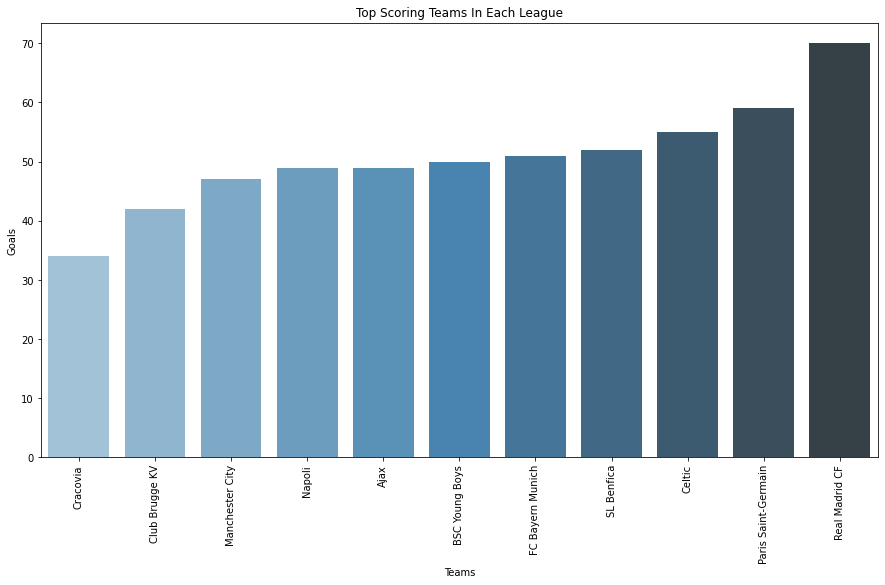

In [59]:
# To plot the distribution of the top scoring teams in each league

display(team_goal_df.reset_index(drop = True))

draw(kind = 'barplot', x_axis = team_goal_df['team_long_name'], y_axis = team_goal_df['goal'], 
     title = 'Top Scoring Teams In Each League', palette = 'Blues_d', x_label = 'Teams', y_label = 'Goals')


### What team has the most goals the 2015/2016 season in each league?

The table above the bar chart gives the names of the teams which topped the goals scored table in each league with Real Madrid of Spain having the highest goals score in the season among major leagues in the whole of Europe.




<a id='r5'></a>
### Research Question 5  (What league has the average highest scored goals  ?)

In [60]:
# Performing an inner join between the Match and League Table
# And returning it as a pandas dataframe

league_goal_df = query("SELECT Match.id, Match.country_id, Match.league_id, League.name, Match.season,"
                       " Match.stage, Match.date, Match.match_api_id," 
                       " Match.home_team_api_id, Match.away_team_api_id, SUM(Match.home_team_goal)+SUM(Match.away_team_goal)"
                       " as goals"
                       " FROM Match INNER JOIN League ON" 
                       " Match.league_id = League.id GROUP BY name, season ORDER BY goals"
                      )

In [61]:
# Grouping the resulting table by the name of the leagues and getting the average of goals scored accross the seasons

league_goal_df = league_goal_df.groupby('name')['goals'].mean()

In [62]:
# Converting the groupby series to a datafram using .reset_index()
# Sorting the table by the number of goals scored
# Ascending order

league_goal_df = league_goal_df.reset_index().sort_values('goals')

In [63]:
# Summary of the league_goal table

league_goal_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 10 to 9
Data columns (total 2 columns):
name     11 non-null object
goals    11 non-null float64
dtypes: float64(1), object(1)
memory usage: 264.0+ bytes


The league_goal dataframe has 11 rows which is equal to the number of countries and leagues in the dataset, and 2 cloumns, goal, and league name

There are no missing values.

In [64]:
# Description of the league_goal table

league_goal_df.describe()

,goals
count,11.000000
mean,798.715909
std,205.275349
min,520.750000
25%,602.812500
50%,887.875000
75%,964.812500
max,1051.500000


The average maximum goals in any league is 1051.5, while the minimum is 520.75 goals across the seasons. The average goals scored in any league is 50.73

,name,goals
0,Switzerland Super League,520.750
1,Poland Ekstraklasa,582.000
2,Scotland Premier League,600.500
3,Belgium Jupiler League,605.125
4,Portugal Liga ZON Sagres,650.125
5,Germany 1. Bundesliga,887.875
6,France Ligue 1,928.375
7,Netherlands Eredivisie,942.750
8,Italy Serie A,986.875
9,England Premier League,1030.000


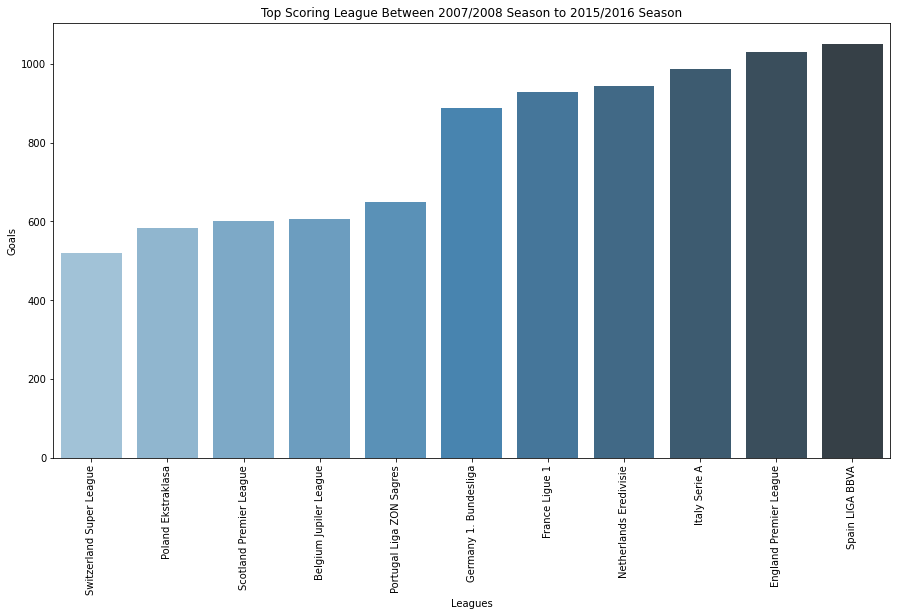

In [65]:
# To plot the distribution of the top scoring teams in each league

display(league_goal_df.reset_index(drop = True))

draw(kind = 'barplot', x_axis = league_goal_df['name'], y_axis = league_goal_df['goals'], 
     title = 'Top Scoring League Between 2007/2008 Season to 2015/2016 Season', palette = 'Blues_d',
     x_label = 'Leagues', y_label = 'Goals')


### What league has the average highest scored goals

The table above the bar chart gives the average goals scored in each leagues across the seasons. The Spanish LaLiga came first with 1,051.5 goals, English Premier League came second with 1030 goals, and Italia Serie A came third with 926.88 goals.



<a id='conclusions'></a>
## Conclusions

The following questions will be addresseed during this research.

1. Does the height of a goal keeper affect the overall rating of the keeper?

2. Do tall players have high heading accuracy

3. Does the weight of a player affect the player's speed?

4. What team in each league has the most goals in the 2015/2016 season?

5. What league has the highest scored goals?

It was found out that the height of a goal keeper does not affect the overall rating of the keeper. However, not having a height at the extreme ends of the distribution increases the posibility or potential of a keeper having a high overall rating.

For the second the question, based on the research done, the height of the player does not necessarily mean the player would have high heading accuracy, however, it was seen that being tall increases the potential of having a high heading accuracy.

The third research question showed that the weight of a player does not necessarily affect the speed of the player. However, a less weighty player is most likely a fast player.

The fourth question addressed showed that Cracovia, Club Brugge KV, Manchester City, Napoli, Ajax, BSC Young Boys, FC Bayern Munich, SL Benfica, Celtic, Paris Saint-Germain, and Real Madrid CF were the teams to score the most goals in their league in Europe in the 2015/2016 season.

The fifth question addressed showed that the Spanish LaLiga had the most goals score in Europe top flight soccer leagues with an average of 1,051.5 goals from the season 2007/2008 to 2015/2016 season.

The limitations encountered during this study was that there was no proper documentation for the dataset. Also, the Match table within the database had some columns that were not properly documented and would require more time to process.

Suggestions for further analysis could be to analyze top performing teams across leagues to find out what attributes makes a top performing team.


In [67]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0